# Clustering Model - Iteration 1
This is the most basic model we could do. This script is meant to be an introduction into how to access and manipulate our current data set.
Created 2020-02-27

In [56]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_pickle('processed_data_stage2.pkl')
data.head()

,Addresses,Gray,Sobel,HOG
0,"1 Eversfield Rd, York.jpg","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.016613979, 0.1960...","[[0.79998046, 1.9028348, 1.3943497, 0.0, 0.0, ...","[[0.15462075], [0.112077594], [0.11590637], [0..."
1,"1 Hopperton Dr, North York.jpg","[[0.0, 0.0, 0.002155846, 0.10380509, 0.1369120...","[[0.0, 0.0, 2.0369756, 3.5243554, 3.783505, 0....","[[0.15955949], [0.16054146], [0.17284158], [0...."
2,"1 Lily Cup Ave, Scarborough.jpg","[[0.031479526, 0.4050593, 0.06488888, 0.0, 0.0...","[[2.4839072, 1.5488079, 0.0, 0.0, 1.8697402, 2...","[[0.17685714], [0.044405024], [0.04170192], [0..."
3,"1 Silverwood Ave, former Toronto.jpg","[[0.0, 0.0, 0.057351105, 0.027877523, 0.006621...","[[1.1575327, 4.1472864, 0.0, 0.8750301, 0.1357...","[[0.14441964], [0.21375896], [0.22531955], [0...."
4,"10 Calderon Cres, North York.jpg","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.88108104, 1.884871, 0.45704815, 2.010...","[[0.113397524], [0.09249692], [0.086846106], [..."


In [32]:
# Load desired columns of data
data_grey = list(data['Gray'])
data_grey = [img.reshape(256*30) for img in data_grey]

In [28]:
# Instantiate K-Means model
km = KMeans(n_jobs=-1, n_clusters=3, n_init=20)

In [35]:
km.fit(data_grey)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
pred = km.predict(data_grey)

Awesome! We have our model trained and a set of predictions. Now each of our data points (addresses is assigned a class of 0, 1, or 2. Let's take a look at what this gives us.

In [55]:
data_img = pd.read_pickle('processed_data_stage1.pkl')   # Has original images
imgs = np.array(data_img['Color'])

# Splits images in classes
class_0 = imgs[pred==0]
class_1 = imgs[pred==1]
class_2 = imgs[pred==2]

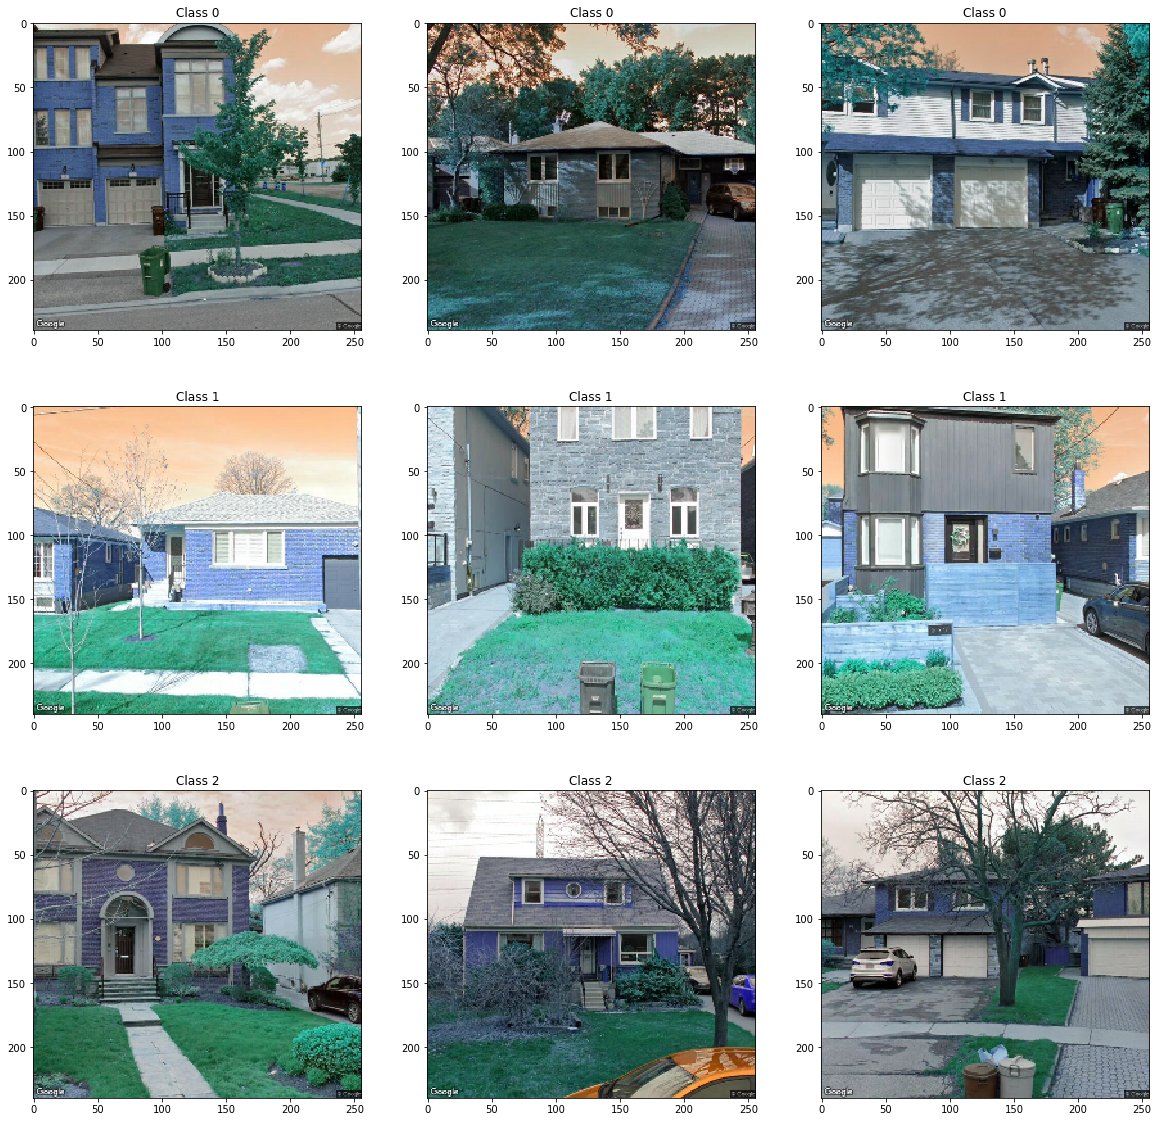

In [61]:
fig = plt.figure(figsize=(20,20))

for i in range(1, 4):
    plt.subplot(3,3,i)
    plt.title('Class 0')
    plt.imshow(class_0[i])
    
    plt.subplot(3,3,i+3)
    plt.title('Class 1')
    plt.imshow(class_1[i])
    
    plt.subplot(3,3,i+6)
    plt.title('Class 2')
    plt.imshow(class_2[i])
    
plt.show()